In [1]:
import sys, os
import numpy as np
import glob
import datetime
import json
import ipdb
import plotly.graph_objects as go
import random
import importlib
import cortex


import sys
sys.path.append('/Users/uriel/disks/meso_H/projects/RetinoMaps/analysis_code/utils')
from pycortex_utils import draw_cortex, set_pycortex_config_file

In [114]:
main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'
subject = 'sub-02'

cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
data_path = '{}/{}/derivatives/pp_data/sub-02/prf/fit/test'.format(main_dir, project_dir)

In [97]:
n_vertex = 294496
n_TR = 208 
n_repeat = 5
n_param = 8
rois = ['occ', 'par', 'frt']



# gauss_fit_mat_repeat = np.random.random((n_vertex,n_param,n_repeat+2))
# gauss_pred_mat_repeat = np.random.random((n_TR,n_vertex,n_repeat+2))
# gauss_pred_mat = np.random.random((n_TR,n_vertex,n_repeat+2))
# duration_repeat = np.random.random((n_repeat+2))
# data_fsnative = np.random.random((n_TR,n_vertex))

gauss_fit_mat_repeat = nb.load('{}/'.format(data_path))
gauss_pred_mat_repeat = 
gauss_pred_mat = 
duration_repeat = 
data_fsnative = 





In [4]:
set_pycortex_config_file(cortex_dir)
importlib.reload(cortex)

<module 'cortex' from '/Users/uriel/softwares/anaconda3/envs/amblyo_env/lib/python3.9/site-packages/cortex/__init__.py'>

In [5]:
roi_verts = cortex.get_roi_verts(subject=subject, 
                                 roi=rois, 
                                 mask=True)

In [105]:
grid_place = 0
no_bd = 1

# Figure 1

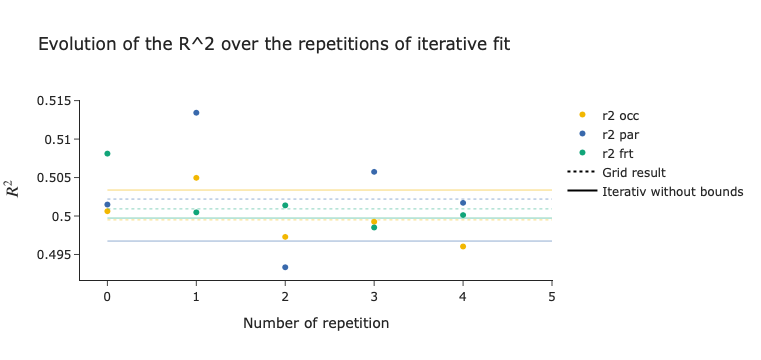

In [107]:

fig = go.Figure()
colors =['rgb(242, 183, 1)','rgb(57, 105, 172)','rgb(17, 165, 121)','rgb(127, 60, 141)']
for i , roi in enumerate(rois) :
    # select roi data 
    df_roi = gauss_fit_mat_repeat[roi_verts[roi],:,:]
    
    r2_mean =np.mean(df_roi[:,-1,2:],axis=0)
    r2_grid_mean = np.mean(df_roi[:,-1,grid_place])
    r2_bd_mean = np.mean(df_roi[:,-1,no_bd])

    
    # plot R2 roi
    fig.add_trace(go.Scatter(
        y=r2_mean,
        mode='markers',
        name='r2 {}'.format(roi),
        line_color=colors[i],
        showlegend=True))

    # plot r2 without bound
    fig.add_shape(
        type='line',
        x0=0, y0=r2_bd_mean, x1=n_repeat, y1=r2_bd_mean,
        line=dict(color=colors[i], width=2, dash='dot'),
        name='R2 without bound')

    # plot r2 grid
    fig.add_shape(
        type='line',
        x0=0, y0=r2_grid_mean, x1=n_repeat, y1=r2_grid_mean,
        line=dict(color=colors[i], width=2, dash='solid'), 
        name='R2 grid')
    
# for the legend
fig.add_trace(go.Scatter(x=[None],
                          y=[None],
                          mode='lines',
                          line=dict(color='black', width=2, dash='dot'),
                          name='Grid result'))

fig.add_trace(go.Scatter(x=[None],
                          y=[None],
                          mode='lines',
                          line=dict(color='black', width=2, dash='solid'),
                          name='Iterativ without bounds'))

fig.update_layout(template='simple_white',
                  title = 'Evolution of the R^2 over the repetitions of iterative fit',
                  xaxis_title = 'Number of repetition',
                  yaxis_title = '$R^2$')
fig.show()


# Figure 2

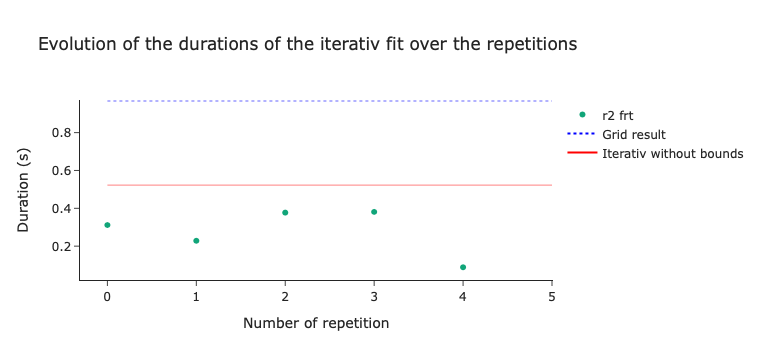

In [106]:
fig2 = go.Figure()

# plot duration iterativ repeat
fig2.add_trace(go.Scatter(
    y=duration_repeat[2:],
    mode='markers',
    name='r2 {}'.format(roi),
    line_color=colors[i],
    showlegend=True))

# plot duration grid 
fig2.add_shape(
    type='line',
    x0=0, y0=duration_repeat[0], x1=n_repeat, y1=duration_repeat[grid_place],
    line=dict(color='blue', width=2, dash='dot'), 
    name='grid')

# plot duration iterativ without bouns
fig2.add_shape(
    type='line',
    x0=0, y0=duration_repeat[1], x1=n_repeat, y1=duration_repeat[no_bd],
    line=dict(color='red', width=2, dash='solid'), 
    name='without bouns')

# for the legend
fig2.add_trace(go.Scatter(x=[None],
                          y=[None],
                          mode='lines',
                          line=dict(color='blue', width=2, dash='dot'),
                          name='Grid result'))

fig2.add_trace(go.Scatter(x=[None],
                          y=[None],
                          mode='lines',
                          line=dict(color='red', width=2, dash='solid'),
                          name='Iterativ without bounds'))


fig2.update_layout(template='simple_white',
                  title = 'Evolution of the durations of the iterativ fit over the repetitions',
                  xaxis_title = 'Number of repetition',
                  yaxis_title = 'Duration (s)')




fig2.show()

# Figure 3

In [63]:
cumulative_durations = np.cumsum(duration_repeat[2:])

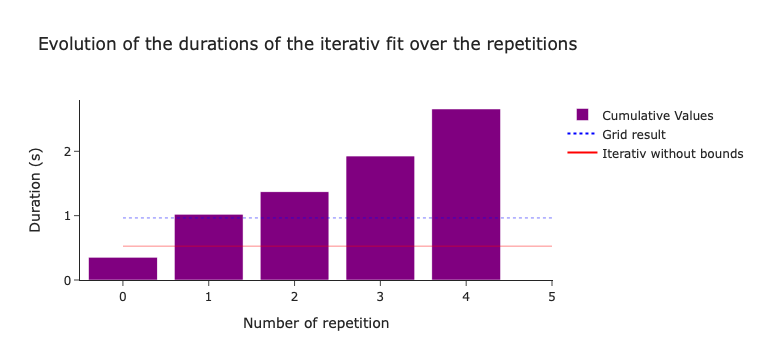

In [112]:
fig3 = go.Figure()

# plot duration iterativ repeat
fig3.add_trace(go.Bar(y=cumulative_values,
                      marker=dict(color='purple'),
                      name='Cumulative Values'))


# plot duration Iterativ without bounds 
fig3.add_shape(
    type='line',
    x0=0, y0=duration_repeat[grid_place], x1=n_repeat, y1=duration_repeat[grid_place],
    line=dict(color='blue', width=2, dash='dot'), 
    name='Grid result')

# plot duration grid 
fig3.add_shape(
    type='line',
    x0=0, y0=duration_repeat[no_bd], x1=n_repeat, y1=duration_repeat[no_bd],
    line=dict(color='red', width=2, dash='solid'), 
    name='Iterativ without bounds')

# for the legend
fig3.add_trace(go.Scatter(x=[None],
                          y=[None],
                          mode='lines',
                          line=dict(color='blue', width=2, dash='dot'),
                          name='Grid result'))

fig3.add_trace(go.Scatter(x=[None],
                          y=[None],
                          mode='lines',
                          line=dict(color='red', width=2, dash='solid'),
                          name='Iterativ without bounds'))


fig3.update_layout(template='simple_white',
                  title = 'Evolution of the durations of the iterativ fit over the repetitions',
                  xaxis_title = 'Number of repetition',
                  yaxis_title = 'Duration (s)')


fig3.show()

# Figure 4

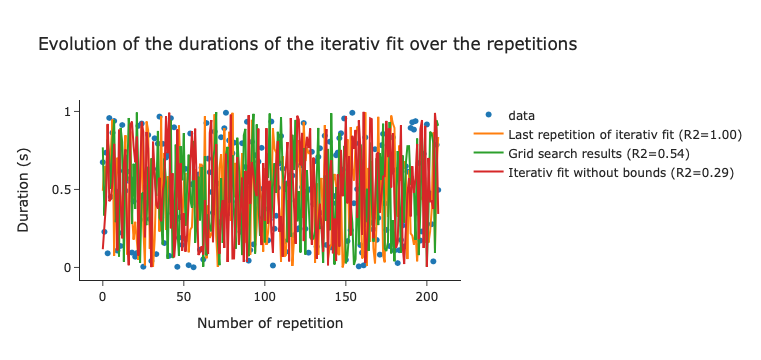

In [113]:
max_r2 = np.argmax(gauss_fit_mat_repeat[:,-1,n_repeat])
num_vert = max_r2


fig4 = go.Figure()
# plot data time series
fig4.add_trace(go.Scatter(y=data_fsnative[:,num_vert],
                         name='data', 
                         mode='markers'))

# plot last iterativ repeat prediction
fig4.add_trace(go.Scatter(y=gauss_pred_mat_repeat[:,num_vert,n_repeat],
                         name='Last repetition of iterativ fit (R2={:1.2f})'.format(gauss_fit_mat_repeat[num_vert,-1,n_repeat])))


# plot grid prediction
fig4.add_trace(go.Scatter(y=gauss_pred_mat_repeat[:,num_vert,grid_place],
                         name='Grid search results (R2={:1.2f})'.format(gauss_fit_mat_repeat[num_vert,-1,grid_place])))

# plot Iterativ no bounds prediction
fig4.add_trace(go.Scatter(y=gauss_pred_mat_repeat[:,num_vert,no_bd],
                         name='Iterativ fit without bounds (R2={:1.2f})'.format(gauss_fit_mat_repeat[num_vert,-1,no_bd])))




fig4.update_layout(template='simple_white',
                  title = 'Evolution of the durations of the iterativ fit over the repetitions',
                  xaxis_title = 'Number of repetition',
                  yaxis_title = 'Duration (s)')


fig4.show()

# Brouillon 

In [ ]:
fig2.add_annotation(
    x=10,  # Modifier la position x selon votre graphique
    y=0.5,  # Modifier la position y selon votre graphique
    xref="x",
    yref="y",
    text="Solid line: grid<br>Dashed line: without bounds",
    showarrow=False,
    font=dict(
        size=12,
        color="black"
    )
)